
#**Часть 1 - Простая линейная регрессия**

## Обучение моделей простой (парной) линейной регрессии, используя для обучения значения х1 и y , а затем х2 и y.

In [348]:
!wget https://raw.githubusercontent.com/Lobanov07/ad_3/main/regression_var_2.csv
!wget https://raw.githubusercontent.com/Lobanov07/ad_3/main/salary.csv


--2025-11-07 22:04:51--  https://raw.githubusercontent.com/Lobanov07/ad_3/main/regression_var_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37201 (36K) [text/plain]
Saving to: ‘regression_var_2.csv.11’

regression_var_2.cs 100%[===================>]  36.33K  --.-KB/s    in 0s      

2025-11-07 22:04:51 (98.7 MB/s) - ‘regression_var_2.csv.11’ saved [37201/37201]

--2025-11-07 22:04:51--  https://raw.githubusercontent.com/Lobanov07/ad_3/main/salary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236085 (231K) [text/plain

### Импорт библиотек

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Загрузка данных

In [350]:
df = pd.read_csv('regression_var_2.csv', sep=";", decimal=',')
df.head()

,x1,x2,y
0,0.847155,-1.399949,2.320641
1,-1.826229,-1.633151,-1.001832
2,-1.053944,1.856604,-2.773939
3,-1.847987,-1.963565,-1.511325
4,1.997064,0.650885,2.852593


### Простая линейная регрессия y ~ x1. Определяем признаки и целевую переменную

In [351]:
X1 = df[['x1']]
y = df['y']

### Создаем и обучаем модель

In [352]:
model_x1 = LinearRegression()
model_x1.fit(X1, y)

LinearRegression()

### Делаем предсказания

In [353]:
y_pred_x1 = model_x1.predict(X1)

### Создание датафрейма с истинными и предсказанными значениями

In [354]:
results_x1 = pd.DataFrame({
    'x1': X1['x1'],
    'y_real': y,
    'y_pred': y_pred_x1,
    'residual': y - y_pred_x1
})

print(results_x1.head(10))


         x1    y_real    y_pred  residual
0  0.847155  2.320641  0.839560  1.481082
1 -1.826229 -1.001832 -1.919443  0.917610
2 -1.053944 -2.773939 -1.122424 -1.651515
3 -1.847987 -1.511325 -1.941897  0.430572
4  1.997064  2.852593  2.026295  0.826297
5  1.806118  3.809779  1.829234  1.980544
6  1.123697  1.138218  1.124958  0.013260
7  1.083438  1.149844  1.083410  0.066434
8  0.231105  1.855480  0.203780  1.651700
9  1.374784  2.505922  1.384086  1.121835


### Метрики качества

In [355]:
mae_x1 = metrics.mean_absolute_error(y, y_pred_x1)
mse_x1 = metrics.mean_squared_error(y, y_pred_x1)
rmse_x1 = np.sqrt(mse_x1)
r2_x1 = metrics.r2_score(y, y_pred_x1)


print("Модель y ~ x1")
print(f"MAE: {mae_x1:.4f}")
print(f"MSE: {mse_x1:.4f}")
print(f"RMSE: {rmse_x1:.4f}")
print(f"R²: {r2_x1:.4f}")

Модель y ~ x1
MAE: 1.1489
MSE: 1.8957
RMSE: 1.3768
R²: 0.4283


### Анализ

**Mean Absolute Error (MAE)** =  1.1489

MAE (Средняя абсолютная ошибка) — это средняя величина абсолютных ошибок предсказаний. Значение MAE (1.1489): Говорит о том, что в среднем, абсолютное отклонение предсказанных значений **y** от фактических **y** составляет примерно **1.15** единиц целевой переменной. Поскольку MAE находится в тех же единицах, что и **y**, это дает прямое понимание средней ошибки модели.

**Mean Squared Error (MSE)** = 1.8957

MSE (Среднеквадратичная ошибка) — это средняя величина квадратов ошибок предсказаний. Значение MSE (1.8957): Это метрика, которая сильнее наказывает большие ошибки (выбросы), так как ошибки возводятся в квадрат. Это значение само по себе не интерпретируется в единицах **y**, но используется для сравнения моделей. Более высокое значение MSE (по сравнению с другими моделями) может указывать на наличие в данных заметных выбросов или на то, что модель плохо справляется с некоторыми точками.

**Root Mean Squared Error (RMSE)** = 1.3768

RMSE (Корень из среднеквадратичной ошибки) — это корень квадратный из MSE. Значение RMSE (1.3768), как и MAE, RMSE выражается в тех же единицах, что и целевая переменная **y**. Это дает меру стандартного отклонения остатков (ошибок).  В среднем, ошибки модели составляют примерно **1.38** единицы. Поскольку **RMSE (1.3768) > MAE (1.1489)**, это подтверждает, что в наборе данных присутствуют большие ошибки (выбросы), которые значительно увеличивают MSE, а, следовательно, и RMSE.

**R-squared ($\mathbf{R^2}$)** = 0.4283

**$\mathbf{R^2}$** (Коэффициент детерминации) — это доля дисперсии целевой переменной, которая объясняется предикторами модели. Значение **$\mathbf{R^2}$** (0.4283) означает, что $42.83\%$ изменчивости (дисперсии) переменной $y$ объясняется простой линейной зависимостью от переменной $x_1$. Это умеренный результат. Модель значима (она лучше, чем простое предсказание среднего значения $y$), но она не является исчерпывающей. Оставшиеся $\approx 57\%$ дисперсии $y$ не объяснены моделью, что может быть связано с влиянием других факторов.


### Коэффициенты *a* и *b*

In [356]:
print(f"Коэффициенты: a = {model_x1.coef_[0]:.4f}, b = {model_x1.intercept_:.4f}")

Коэффициенты: a = 1.0320, b = -0.0347


### Анализ коэффициентов модели

Коэффициент наклона ***a =  1.0320***

Это положительное значение, которое указывает на прямую линейную зависимость между предиктором **x_1** и целевой переменной **y**. Увеличение независимой переменной **x_1** на одну единицу приводит к увеличению предсказанного значения $y$ примерно на **1.0320** единицы. Это ключевой показатель силы и направления связи.

Свободный член ***b = -0.0347***

Это предсказанное значение целевой переменной **y** в случае, когда независимая переменная **x_1** равна нулю **x_1=0**. Поскольку значение очень близко к нулю, это означает, что линия регрессии проходит практически через начало координат.

### Визуализация регрессии

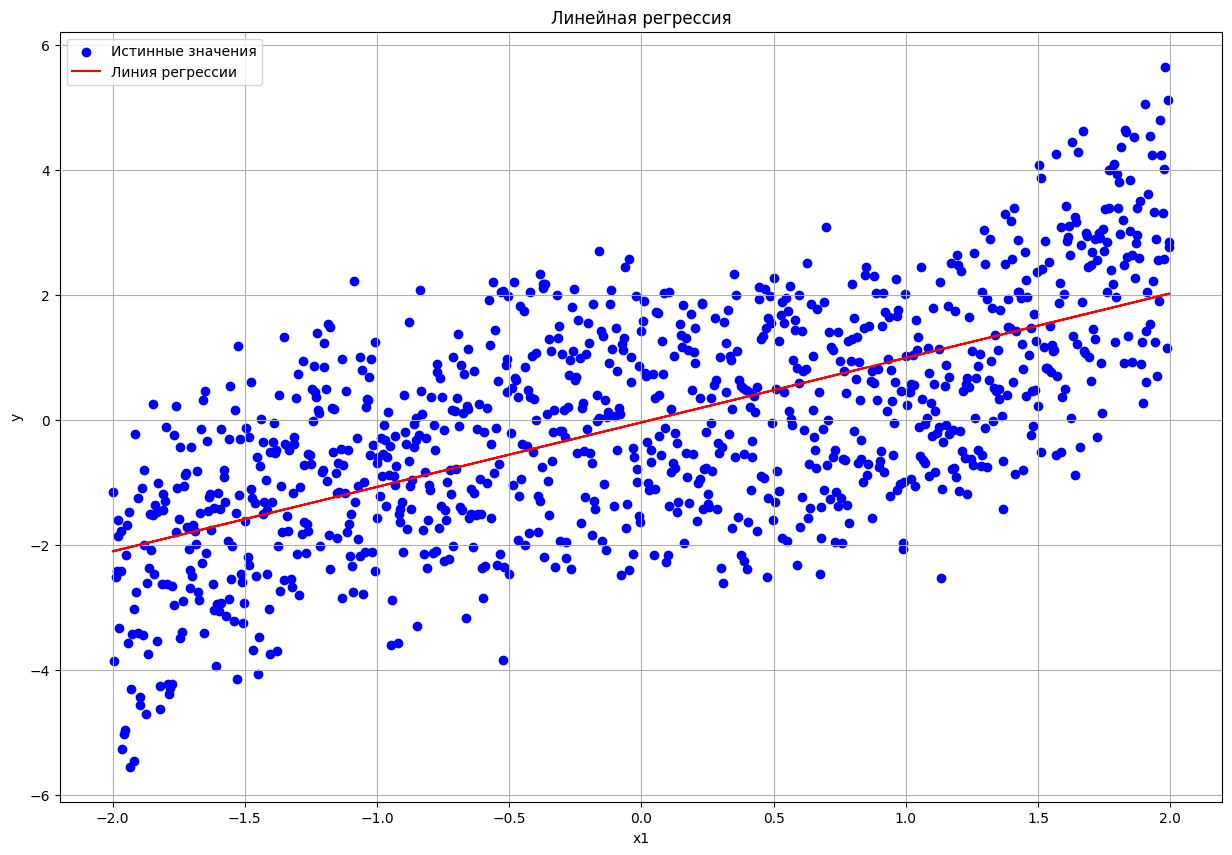

In [357]:
plt.figure(figsize=(15, 10))
plt.scatter(df['x1'], y, color='blue', label='Истинные значения')
plt.plot(df['x1'], y_pred_x1, color='red', label='Линия регрессии')
plt.title('Линейная регрессия')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Анализ: График показывает, что между **x_1** и **y** есть связь. Когда **x_1** растёт, **y** тоже растёт. Красная линия (предсказание модели) идёт в правильном направлении. Эта линия — лучшая попытка провести прямую через все синие точки (реальные данные). Однако, видно, что синие точки сильно разбросаны и не прилегают плотно к красной линии. Эти большие вертикальные расстояния между точками и линией — это ошибки (то, что модель не смогла предсказать).

### Разница предсказанных и истинных значений

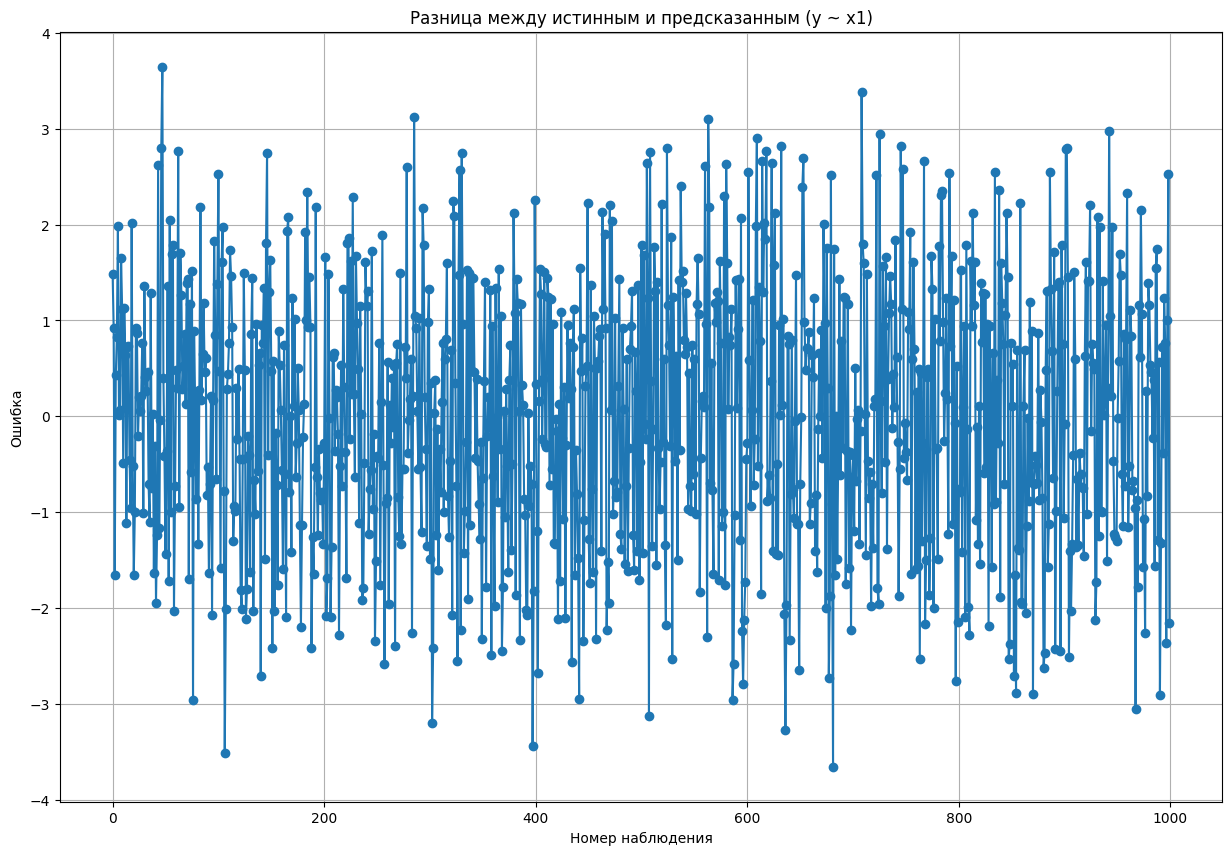

In [358]:
plt.figure(figsize=(15, 10))
plt.plot(y.values - y_pred_x1, marker='o')
plt.title('Разница между истинным и предсказанным (y ~ x1)')
plt.xlabel('Номер наблюдения')
plt.ylabel('Ошибка')
plt.grid()
plt.show()

Анализ: Этот график показывает, насколько сильно модель ошибается при предсказании **y**. Остатки (вертикальные точки) разбросаны вокруг нуля, что, в принципе, хорошо. Однако, некоторые ошибки очень большие (точки высоко над нулём или глубоко под ним, например, около $\pm 3.0$), что подтверждает, что модель недостаточно точна. Нет очевидного кривого узора (например, параболы) в расположении ошибок, поэтому проблема не в том, что данные нелинейны, а в том, что на **y** сильно влияют другие, неучтенные факторы, кроме **x_1**.

### Обучение модели, используя значения **x_2**

### Создаем и обучаем модель, делаем предсказания

In [359]:
X2 = df[['x2']]

model_x2 = LinearRegression()
model_x2.fit(X2, y)

y_pred_x2 = model_x2.predict(X2)


### Определяем метрики качества

In [360]:
mae_x2 = metrics.mean_absolute_error(y, y_pred_x2)
mse_x2 = metrics.mean_squared_error(y, y_pred_x2)
rmse_x2 = np.sqrt(mse_x2)
r2_x2 = metrics.r2_score(y, y_pred_x2)


print("Модель y ~ x2")
print(f"MAE: {mae_x2:.4f}")
print(f"MSE: {mse_x2:.4f}")
print(f"RMSE: {rmse_x2:.4f}")
print(f"R²: {r2_x2:.4f}")

Модель y ~ x2
MAE: 1.1004
MSE: 2.0903
RMSE: 1.4458
R²: 0.3696


### Анализ

**Mean Absolute Error (MAE)** = 1.1004

MAE (Средняя абсолютная ошибка) — это средняя величина абсолютных ошибок предсказаний. Значение MAE (1.1004): Говорит о том, что в среднем, абсолютное отклонение предсказанных значений **y** от фактических **y** составляет примерно **1.1** единиц целевой переменной. Поскольку MAE находится в тех же единицах, что и **y**, это дает прямое понимание средней ошибки модели.

**Mean Squared Error (MSE)** = 2.0903

MSE (Среднеквадратичная ошибка) — это средняя величина квадратов ошибок предсказаний. Значение MSE (2.0903): Это метрика, которая сильнее наказывает большие ошибки (выбросы), так как ошибки возводятся в квадрат. Это значение само по себе не интерпретируется в единицах **y**, но используется для сравнения моделей. Более высокое значение MSE (по сравнению с другими моделями) может указывать на то, что модель $y \sim x_2$ хуже справляется с большими ошибками, чем модель $y \sim x_1$.

**Root Mean Squared Error (RMSE)** = 1.4458

RMSE (Корень из среднеквадратичной ошибки) — это корень квадратный из MSE. Значение RMSE (1.4458), как и MAE, RMSE выражается в тех же единицах, что и целевая переменная **y**. Это дает меру стандартного отклонения остатков (ошибок).  В среднем, ошибки модели составляют примерно **1.45** единицы. Поскольку **RMSE (1.4458) > MAE (1.1004)**, это подтверждает, что в наборе данных присутствуют большие ошибки (выбросы), которые значительно увеличивают MSE, а, следовательно, и RMSE.

**R-squared ($\mathbf{R^2}$)** = 0.3696

**$\mathbf{R^2}$** (Коэффициент детерминации) — это доля дисперсии целевой переменной, которая объясняется предикторами модели. Значение **$\mathbf{R^2}$** (0.3696) означает, что $36.96\%$ изменчивости (дисперсии) переменной **y** объясняется простой линейной зависимостью от переменной **x_2**.Интерпретация: Это умеренный результат. Модель значима (она лучше, чем простое предсказание среднего значения **y**), но она не является исчерпывающей. Оставшиеся $\approx 63\%$ дисперсии **y** не объяснены моделью, что может быть связано с влиянием других факторов.


Это слабый результат. Модель значима (она лучше, чем простое предсказание среднего), но она менее эффективна, чем модель с **x_1** ($R^2=0.4283$). Оставшиеся $\approx 63\%$ дисперсии **y** не объяснены моделью, что явно указывает на необходимость использования более сложной модели, включающей оба предиктора.

### Коэффициенты *a* и *b*

In [361]:
print(f"Коэффициенты: a = {model_x2.coef_[0]:.4f}, b = {model_x2.intercept_:.4f}")

Коэффициенты: a = -0.9587, b = -0.0346


### Анализ коэффициентов модели

Коэффициент наклона ***a = -0.9587***

Это отрицательное значение, которое указывает на обратную линейную зависимость между предиктором **x_2** и целевой переменной **y**. Увеличение независимой переменной **x_2** на одну единицу приводит к уменьшению предсказанного значения **y** примерно на **0.9587** единицы. Это ключевой показатель силы и направления связи.

Свободный член ***b = -0.0346***

Это предсказанное значение целевой переменной **y** в случае, когда независимая переменная **x_1** равна нулю **x_1=0**. Поскольку значение очень близко к нулю, это означает, что линия регрессии проходит практически через начало координат.

### Визуализация регрессии

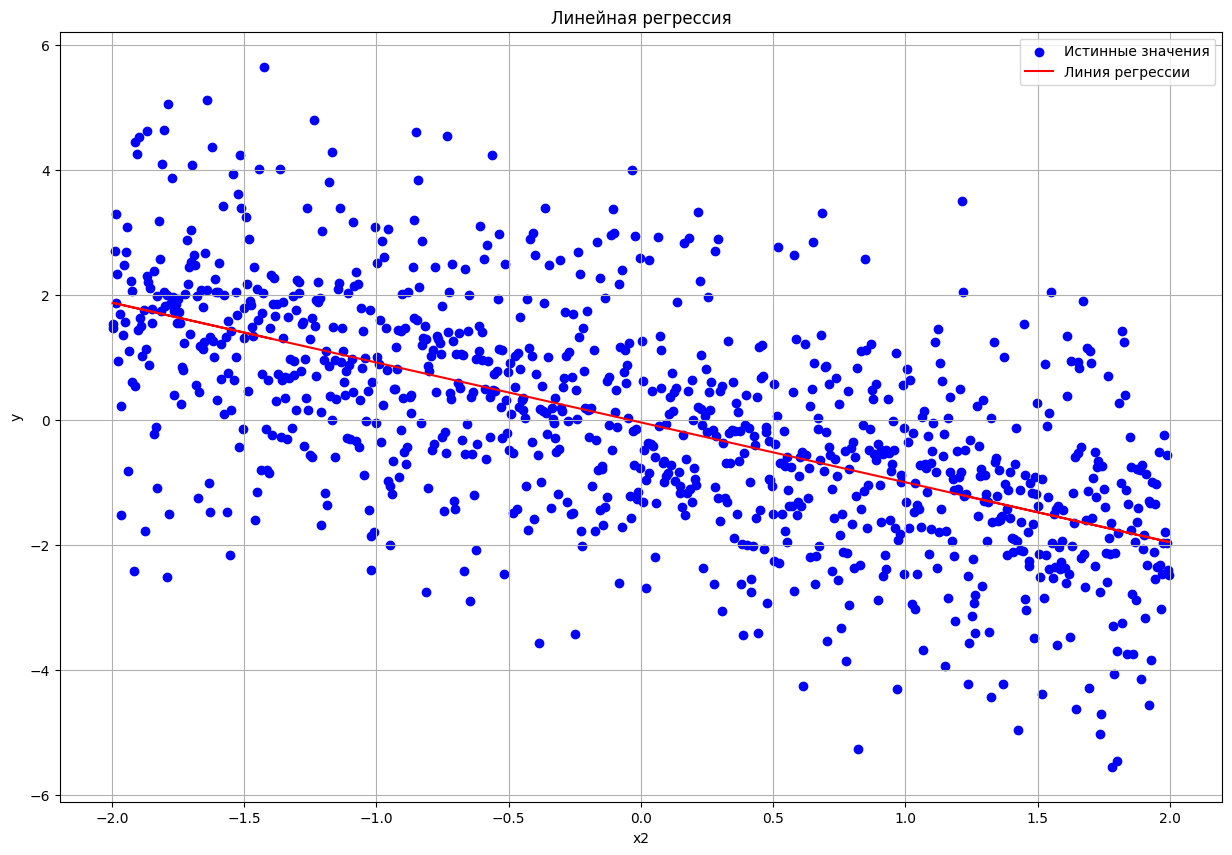

In [362]:
plt.figure(figsize=(15, 10))
plt.scatter(df['x2'], y, color='blue', label='Истинные значения')
plt.plot(df['x2'], y_pred_x2, color='red', label='Линия регрессии')
plt.title('Линейная регрессия')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Анализ: график показывает, что между **x_2** и **y** есть слабая обратная связь. Когда **x_2** растёт (движемся вправо), **y**  уменьшается (движемся вниз), что подтверждает отрицательный коэффициент наклона. Красная линия (предсказание модели) отражает эту слабую нисходящую тенденцию. Однако, синие точки (реальные данные) очень сильно разбросаны вокруг красной линии. Кажется, что точки расположены почти случайно, а линия лишь формально проходит через их центр. Большие вертикальные расстояния между точками и линией — это ошибки (то, что модель не смогла предсказать). Этот сильный разброс и низкая концентрация точек вокруг линии указывают на то, что **x_2** очень слабо влияет на **y**, и модель **x_2** имеет низкую объясняющую силу (что подтверждается низким **R^2**.

### Разница предсказанных и истинных значений

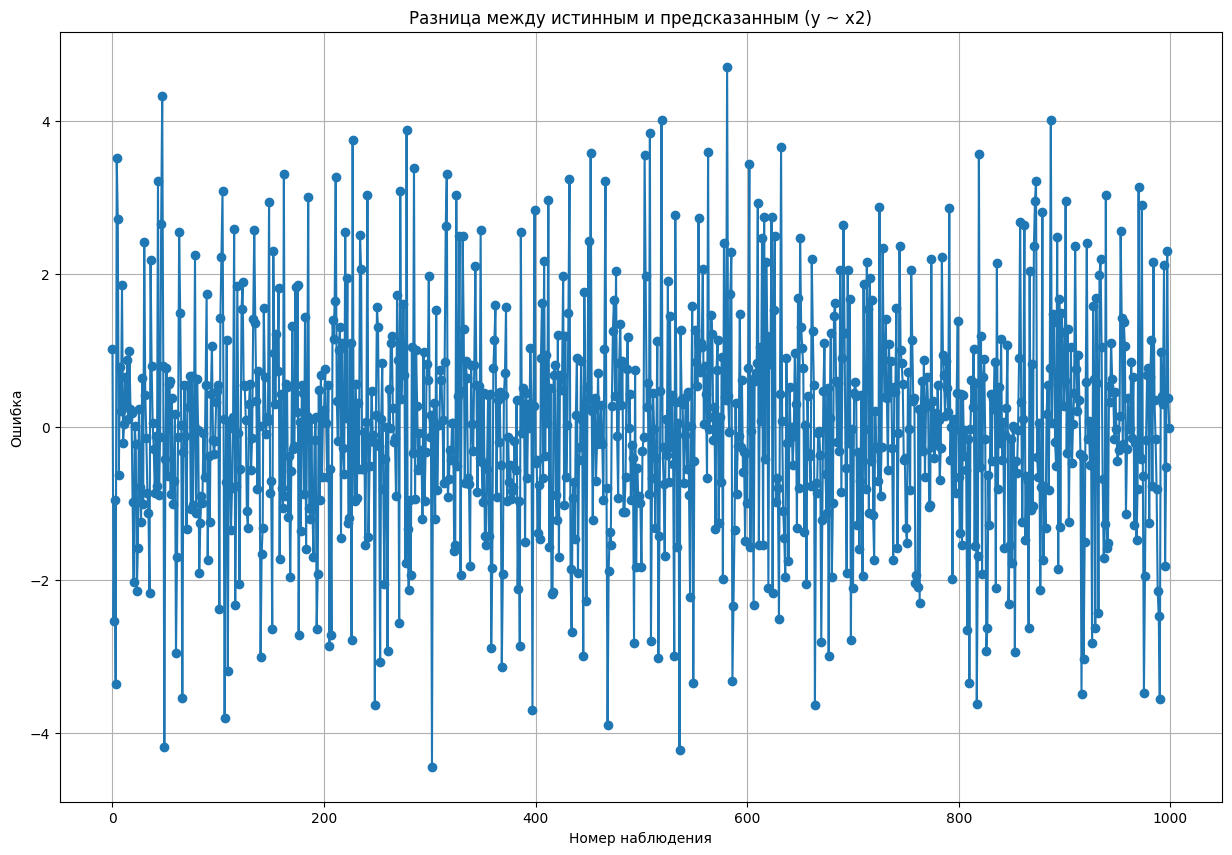

In [363]:
plt.figure(figsize=(15, 10))
plt.plot(y.values - y_pred_x2, marker='o')
plt.title('Разница между истинным и предсказанным (y ~ x2)')
plt.xlabel('Номер наблюдения')
plt.ylabel('Ошибка')
plt.grid()
plt.show()

Анализ: Этот график показывает, насколько сильно модель ошибается при предсказании **y**. Остатки (вертикальные точки) разбросаны вокруг нуля, что, в принципе, хорошо. Однако, некоторые ошибки очень большие (точки высоко над нулём или глубоко под ним, например, около $\pm 4.0$), что подтверждает, что модель недостаточно точна. Нет очевидного кривого узора (например, параболы) в расположении ошибок, поэтому проблема не в том, что данные нелинейны, а в том, что на **y** сильно влияют другие, неучтенные факторы, кроме **x_2**.

### Вывод

Анализ простой линейной регрессии показал, что оба предиктора, **x_1** и **x_2**, имеют линейную связь с целевой переменной **y**, но **x_1** является более сильным предиктором. Модель **x_1** объяснила **42.83\%** дисперсии (**R^2), в то время как модель **x_2** объяснила лишь **36.96\%**. В обоих случаях большая часть изменчивости **y** осталась необъясненной (более $57\%$), что подтверждается высокими ошибками **RMSE** (в среднем $\sim 1.4$ единицы). Графический анализ подтвердил, что линия регрессии отражает общую тенденцию, но сильный разброс остатков указывает на то, что для получения точных предсказаний необходимо перейти к множественной регрессии, чтобы учесть совместное влияние обоих факторов (**x_1** и **x_2**) и уменьшить необъясненную долю дисперсии.


#**Часть 2 - Полиномиальная регрессия**

### Использование PolynomialFeatures для реализации модели полиномиальной регрессии. Выбор степень полинома. Обучение модели полиномиальной регрессии.

### Обучение модели со второй степенью полинома для **x_2** и **y**

In [364]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

poly = PolynomialFeatures(degree=2)
x1_poly = poly.fit_transform(X1)

model = LinearRegression()
model.fit(x1_poly, y)


LinearRegression()

### Предсказание

In [365]:
y_pred_poly_1 = model.predict(x1_poly)


 ### Подсчитать и вывести метрики качества регрессии (MAE, R²).

In [366]:
mae = mean_absolute_error(y, y_pred_poly_1)
r2 = r2_score(y, y_pred_poly_1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.148089758536194
R-squared (R²): 0.42889562557102845


Предоставленные метрики (**MAE 1.15** и **R^2 = 0.4289**) показывают, что модель **x_1** имеет умеренную объясняющую силу, поскольку предиктор **x_1** смог объяснить лишь **42.89%** изменчивости целевой переменной **y**. Это делает связь значимой, но неполной. Относительно высокое значение **MAE = 1.15** единицы подтверждает, что в среднем ошибки предсказания заметны.
Полученные данные показывают, что модель второй степени хорошо подходит для наших данных.

### Коэффициенты *a* и *b*

In [367]:
print(f"Коэффициенты: a = {model.coef_}, b = {model.intercept_}")

Коэффициенты: a = [0.         1.03202396 0.03818624], b = -0.08563914426771066


### Визуализация регрессии

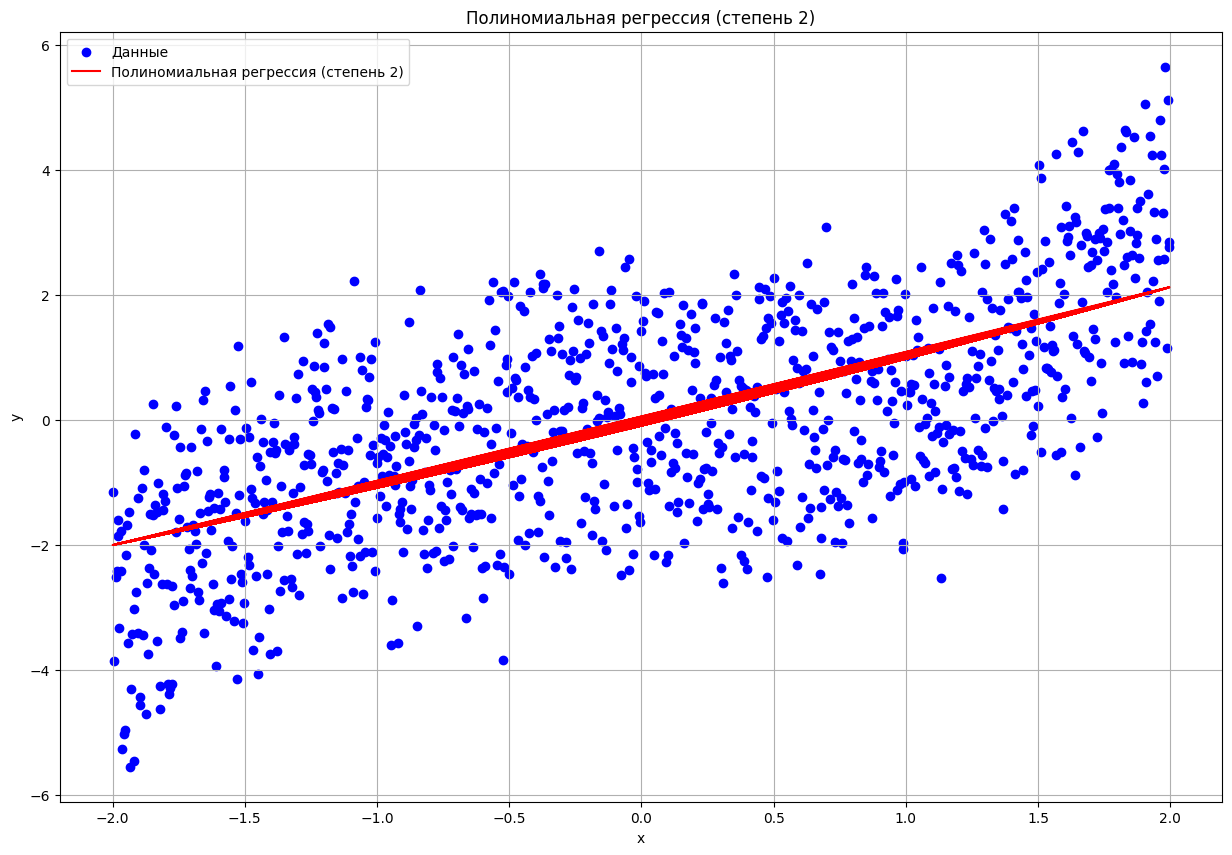

In [368]:
plt.figure(figsize=(15, 10))
plt.scatter(X1, y, color='blue', label='Данные')
plt.plot(X1, y_pred_poly_1, color='red', label='Полиномиальная регрессия (степень 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная регрессия (степень 2)')
plt.legend()
plt.grid(True)
plt.show()

На графике показано, что красная криваяпроходит очень близко к большинству синих точек (реальным данным). Эта кривая второй степени успешно уловила нелинейную тенденцию в данных.

 ### Повтор пунктов предыдущих пунктов второй части для другой степени полинома

### Обучение модели с пятой степенью полинома для **x_2** и **y**

In [369]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

poly_5 = PolynomialFeatures(degree=5)
x1_poly_5 = poly_5.fit_transform(X1)

model_5 = LinearRegression()
model_5.fit(x1_poly_5, y)


LinearRegression()

### Предсказание

In [370]:
y_pred_poly_5 = model_5.predict(x1_poly_5)


 ### Подсчитать и вывести метрики качества регрессии (MAE, R²).

In [371]:
mae = mean_absolute_error(y, y_pred_poly_5)
r2 = r2_score(y, y_pred_poly_5)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.0959645203768105
R-squared (R²): 0.4855197832549377


Представленные метрики (**MAE = 1.10** и **R^2 = 0.4839**) показывают, что использование полиномиальной пятой степени регрессии позволило улучшить качество модели по сравнению с лучшей простой линейной моделью (**x_1**, где **R^2 == 0.4289**). Новое значение **R^2 = 0.4839** означает, что модель теперь объясняет **48.39%** дисперсии **y**, а средняя абсолютная ошибка **MAE** немного снизилась до **1.10** единиц. Это улучшение произошло благодаря добавлению гибкости модели (за счёт членов $x^2, x^3$ и т.д.), что позволило ей лучше следовать нелинейным изгибам в данных. Однако, несмотря на повышение степени, половина дисперсии всё ещё остается необъясненной, что является сильным сигналом о влиянии второго предиктора **x_1** или риске переобучения, если использовалась слишком высокая степень.

### Коэффициенты *a* и *b*

In [372]:
print(f"Коэффициенты: a = {model_5.coef_}, b = {model_5.intercept_}")

Коэффициенты: a = [ 0.          0.24078382 -0.15896999  0.28752732  0.05747199  0.01475762], b = -0.006688711312098552


### Визуализация регрессии

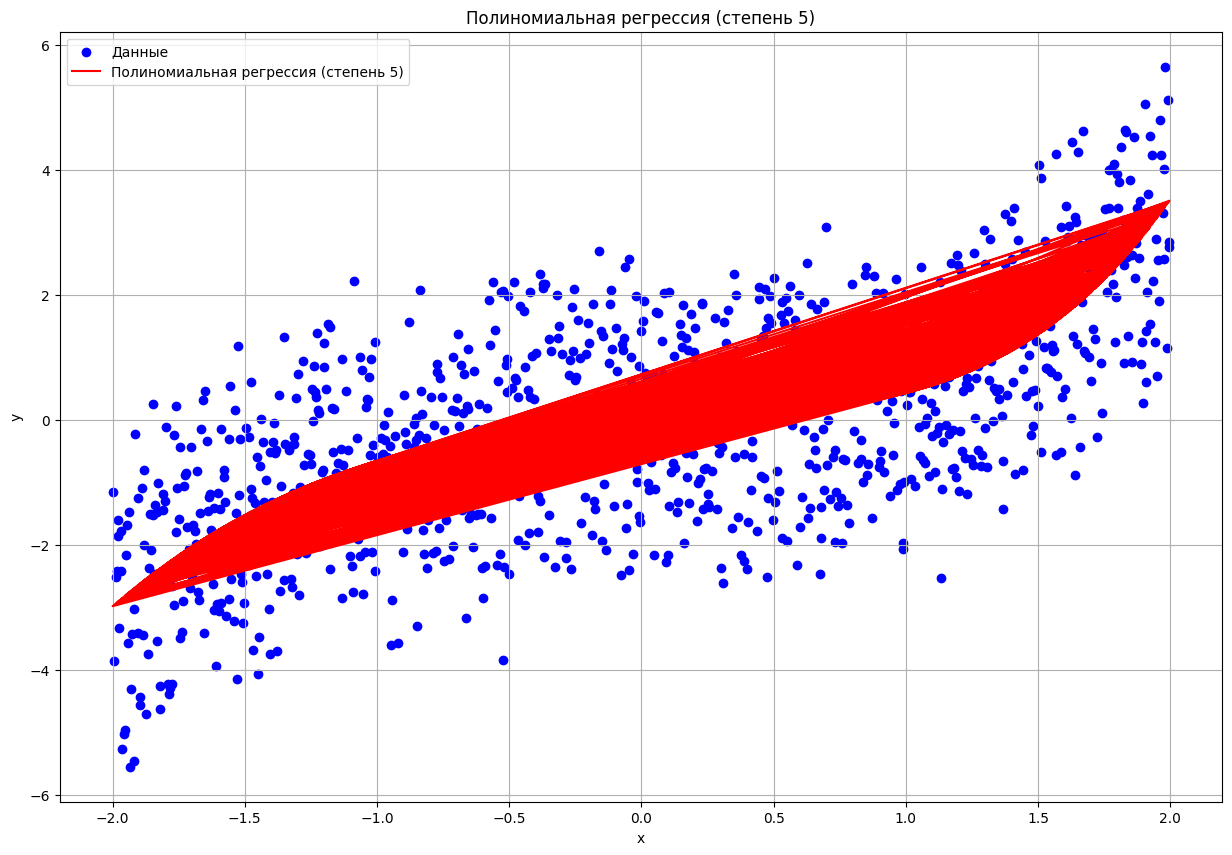

In [373]:
plt.figure(figsize=(15, 10))
plt.scatter(X1, y, color='blue', label='Данные')
plt.plot(X1, y_pred_poly_5, color='red', label='Полиномиальная регрессия (степень 5)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная регрессия (степень 5)')
plt.legend()
plt.grid(True)
plt.show()

Анализ графика полиномиальной регрессии пятой степени указывает на переобучение (Overfitting). Красная кривая слишком резко изгибается и "тянется" за отдельными синими точками, что является следствием того, что модель обладает чрезмерно высокой степенью (свободой). Вместо того чтобы находить общую, ровную зависимость, модель повторяет случайный шум и уникальные особенности обучающего набора данных, что статистически выражается в высокой дисперсии. Из-за этой чрезмерной чувствительности модель теряет обобщающую способность и становится практически бесполезной для предсказания новых данных, поскольку ее "широкие" изгибы, основанные на шуме, приведут к большим ошибкам на тестовой выборке. Решение состоит в том, чтобы выбрать более низкую степень полинома (например, 3 или 4), которая уловит нелинейный тренд, но при этом будет достаточно плавной и устойчивой к шуму.

### Вывод
Основываясь на проведенном анализе, оптимальную степень полинома следует выбирать не по наилучшему **R^2** на обучающей выборке (где победила 5-я степень с **R^2 = 0.4839**), а по ее способности обобщать данные, т.е. по результатам на тестовой выборке. Оптимальная степень должна быть достаточно высокой, чтобы уловить нелинейный тренд (**n >= 1**), но не слишком большой, как **n=5**, чтобы избежать переобучения. Слишком низкая степень (недообучение) приводит к тому, что модель игнорирует нелинейный тренд и дает высокие ошибки, в то время как слишком большая степень (переобучение) приводит к тому, что модель повторяет шум и резко снижает точность на новых, неизвестных данных, о чем наглядно свидетельствует чрезмерно извилистый и "широкий" вид кривой 5-й степени на графике.


#**Часть 3 - Решение задачи регрессии различными методами**

### Подготовка данных и выбор целевой переменной

In [435]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from yellowbrick.regressor import PredictionError
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('salary.csv')

In [375]:
df.head()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


In [377]:
print(df.isna().sum(), '\n')

age                 0
income              0
experience          0
score_test          0
hours_worked        0
distance_to_work    0
savings             0
debt                0
education           0
city                0
job_type            0
marital_status      0
car                 0
remote_work         0
salary              0
dtype: int64 



In [378]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print(f'Количество строк в датафрейме до удаления явных дубликатов: {df.shape[0]}')

Количество дубликатов: 0
Количество строк в датафрейме до удаления явных дубликатов: 1500


Названия столбцов в порядке, пропусков нет, явных и неявных дубликатов нет.

Целевая переменная - salary

### Гистограмма распределения целевой переменной и боксплот по целевой пеерменной

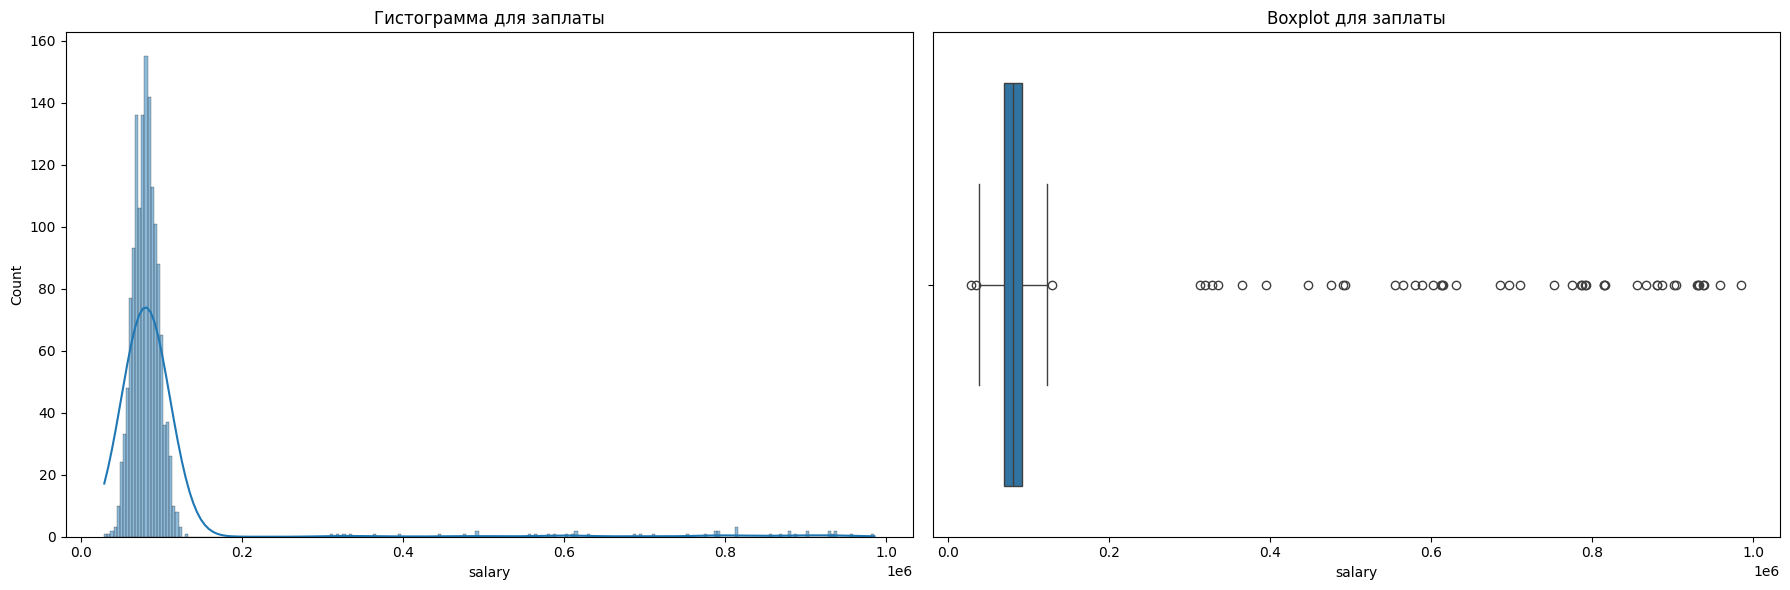

In [379]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['salary'], kde=True)
plt.title('Гистограмма для заплаты')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary'])
plt.title('Boxplot для заплаты')

plt.tight_layout()
plt.show()

Основная масса данных (salary) имеет скошенное (асимметричное) распределение, где большая часть значений сосредоточена слева (меньшие зарплаты). Хвост распределения вытянут вправо. На графике видно, что основной пик (мода) находится в диапазоне, а затем есть отдельные столбики далеко справа, которые оторваны от основного распределения. Эти столбики представляют собой аномально высокие значения зарплат, которые встречаются очень редко. Эти выбросы, имеющие очень большие значения **Y**, будут сильно "тянуть" линию линейной регрессии вверх, что приведет к искажению коэффициентов и увеличению метрик ошибок.

Самый распространенный и обоснованный метод для удаления выбросов в регрессии — это использование Межквартильного Диапазона (Interquartile Range, IQR).

In [380]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df_cleaned = df[(df['salary'] > lower_bound) & (df['salary'] < upper_bound)]

removed_count = len(df) - len(df_cleaned)
print(f"Общее количество строк до удаления: {len(df)}")
print(f"Количество удаленных выбросов (строк): {removed_count}")
print(f"Количество строк после удаления: {len(df_cleaned)}")

Общее количество строк до удаления: 1500
Количество удаленных выбросов (строк): 48
Количество строк после удаления: 1452


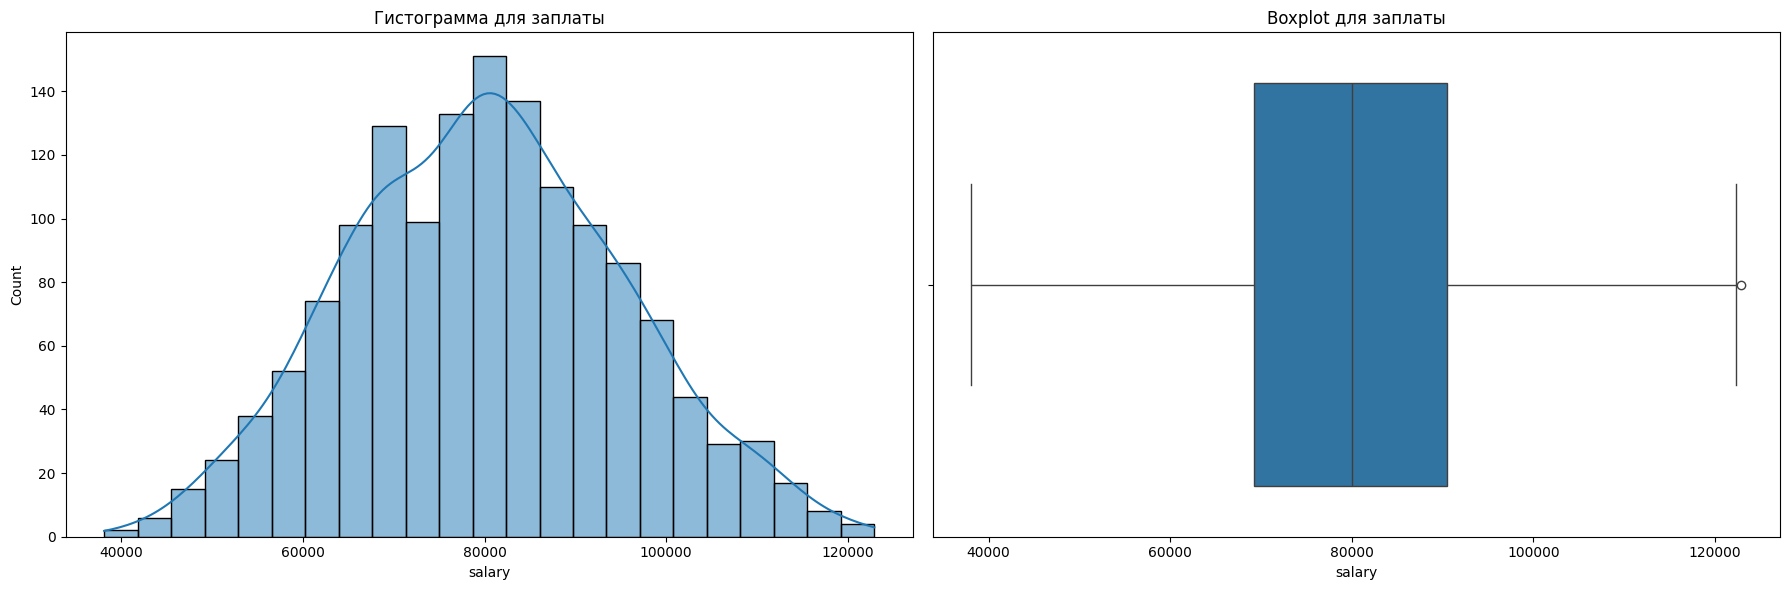

In [381]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['salary'], kde=True)
plt.title('Гистограмма для заплаты')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['salary'])
plt.title('Boxplot для заплаты')

plt.tight_layout()
plt.show()

По гистограмме можно сказать, что распределение зарплат одномодальное (один ярко выраженный пик около 80 000–90 000), положительно асимметричное (правый хвост длиннее левого) и в целом напоминает логнормальное распределение — типичная картина для доходов: большинство людей получают среднюю зарплату, а небольшая группа — значительно больше.

По боксплоту видно, что медиана находится примерно на уровне 80 000, интерквартильный размах (IQR) — от ~60 000 до ~100 000.  
Верхний ус тянется до ~120 000, а нижний — почти до 40 000.  
Выбросов нет — все точки лежат в пределах усов, что подтверждает отсутствие экстремально высоких или низких значений за пределами ожидаемого разброса.

### Постоение матрицы диаграмм рассеяния

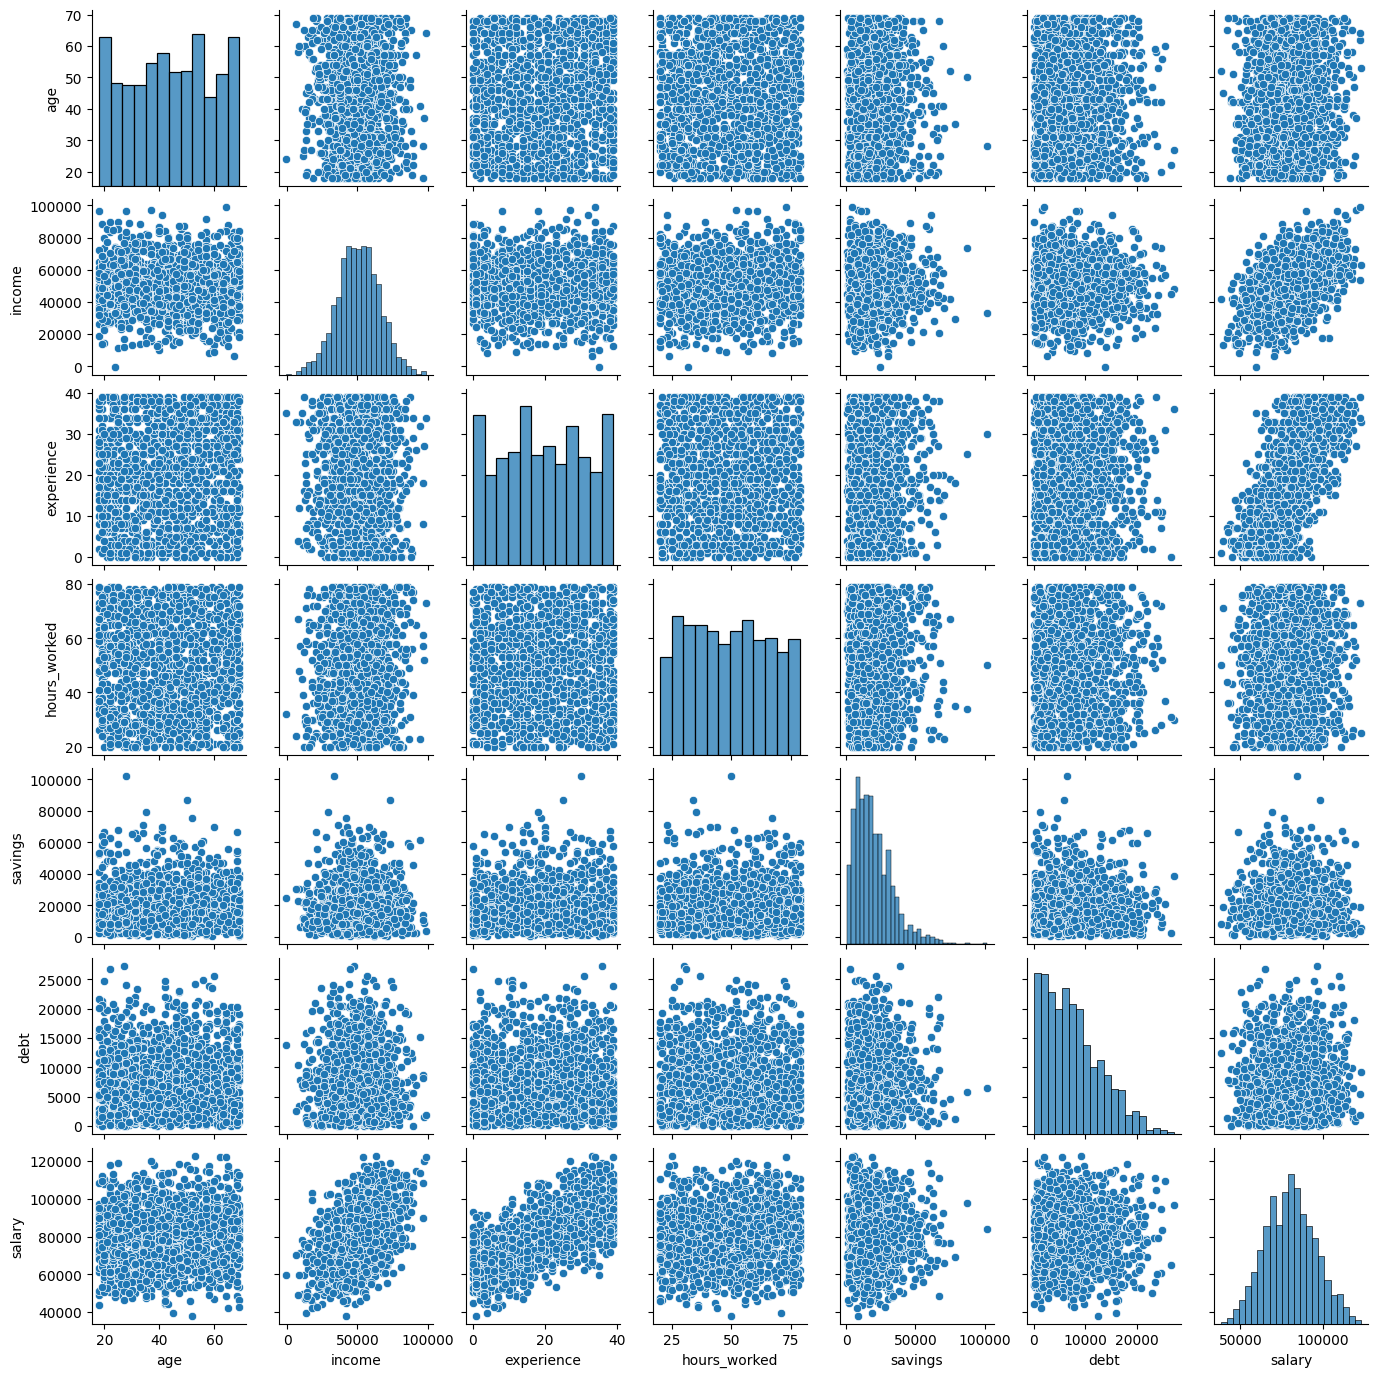

In [382]:
sns.pairplot(df_cleaned[['age', 'income', 'experience', 'hours_worked', 'savings', 'debt', 'salary']], height=2)
plt.show()

Матрица рассеяния показывает, что зарплата, доход, сбережения и долг - логнормально распределены с правой асимметрией, а возраст и опыт - мультимодальны (несколько возрастных/стажных групп), часы работы - бимодальны (40 и 60+ ч/нед). Зарплата сильно коррелирует с опытом, доходом и возрастом, слабее с часами, сбережения растут с доходом, долги - нет. Выбросов нет, связи нелинейны - для моделирования стоит использовать лог-преобразование и нелинейные алгоритмы.

### Применение One-Hot Encoding и Label Encoding для категориальных данных

In [387]:
non_numeric_columns = df_cleaned.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in non_numeric_columns:
    if df_cleaned[column].nunique() == 2:
        df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])
    else:
        df_cleaned = pd.get_dummies(df_cleaned, columns=[column], drop_first=True)


In [389]:
df_cleaned.head()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,car,remote_work,...,city_Houston,city_Los Angeles,city_New York,city_Phoenix,job_type_Finance,job_type_Healthcare,job_type_IT,job_type_Retail,marital_status_Married,marital_status_Single
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,1,1,...,False,False,False,False,True,False,False,False,False,True
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,0,1,...,True,False,False,False,False,False,False,True,False,True
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,1,0,...,False,True,False,False,True,False,False,False,True,False
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,1,0,...,False,True,False,False,False,False,True,False,True,False
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,0,0,...,False,False,False,True,False,False,True,False,True,False


Применяем Label Encoding для бинарных столбцов, а для тех где много категориальных значений применяем OneHotEncoding для того, чтобы не потерять значимость фичей.

### Отбор столбцов, коррелирующих с зарплатой

In [394]:
corr_matrix = df_cleaned.corr()

salary_corr = corr_matrix['salary']

high_corr_columns = [column for column in salary_corr.index if column != 'salary' and abs(salary_corr[column]) > 0.1]
print(f"Отобранные столбцы с корреляцией с salary: {high_corr_columns}")


Отобранные столбцы с корреляцией с salary: ['income', 'experience', 'education_High School', 'education_Master', 'education_PhD', 'job_type_IT', 'job_type_Retail']


Были выбраны столбцы, которые коррелируют с зарплатой.

### Нормализация данных

In [396]:
car_corr_data = df_cleaned[high_corr_columns]
car_corr_data = pd.concat([car_corr_data, df_cleaned['salary']], axis=1)

numeric_cols = car_corr_data.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
car_corr_data[numeric_cols] = scaler.fit_transform(car_corr_data[numeric_cols])


In [397]:
car_corr_data.head()

,income,experience,education_High School,education_Master,education_PhD,job_type_IT,job_type_Retail,salary
0,1.278460,0.481120,False,False,True,False,False,1.723979
1,0.085708,1.701357,True,False,False,False,True,0.467842
2,-0.780960,-1.349236,False,False,True,False,False,-0.709571
3,-0.041534,0.045321,False,False,False,True,False,-0.233098
4,-0.105701,-0.564798,False,False,False,True,False,-0.600394


### Разбиение на обучающую и тестовую выборки

In [400]:
X = car_corr_data.drop('salary', axis=1)
y = car_corr_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Обучение модели линейной регрессии

In [402]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)



### Применение метрик

In [404]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Линейная регрессия:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr}")
print(f"R-squared (R²): {r2_lr}")

Линейная регрессия:
Mean Squared Error (MSE): 0.16875642850053862
Mean Absolute Error (MAE): 0.3259608551874504
Mean Absolute Percentage Error (MAPE): 2.4824902890466607
R-squared (R²): 0.8541603059185818


### Создание датафрейма с истинными и предсказанными значениями для линейной регрессии

In [414]:
df_predictions_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr}).reset_index(drop=True)
print(df_predictions_lr.head(10))

     Actual  Predicted
0  0.703311   0.570689
1  0.287630   0.516486
2 -0.814638  -1.157239
3  2.015548   1.782212
4 -0.763578  -0.797211
5 -0.052397  -0.653454
6 -1.356382  -1.726620
7  0.679382   0.247894
8  0.802879   0.920251
9 -0.053279   0.143642


### Вывод коэффициентов линейной регрессии

In [420]:
coefficients = model_lr.coef_

df_coefficients_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_lr.coef_
})


df_coefficients_lr[['Feature', 'Coefficient']]


,Feature,Coefficient
0,income,0.488729
1,experience,0.681295
2,education_High School,-0.413599
3,education_Master,0.437129
4,education_PhD,0.838383
5,job_type_IT,0.184020
6,job_type_Retail,-0.138573


### Визуализация предсказаний модели

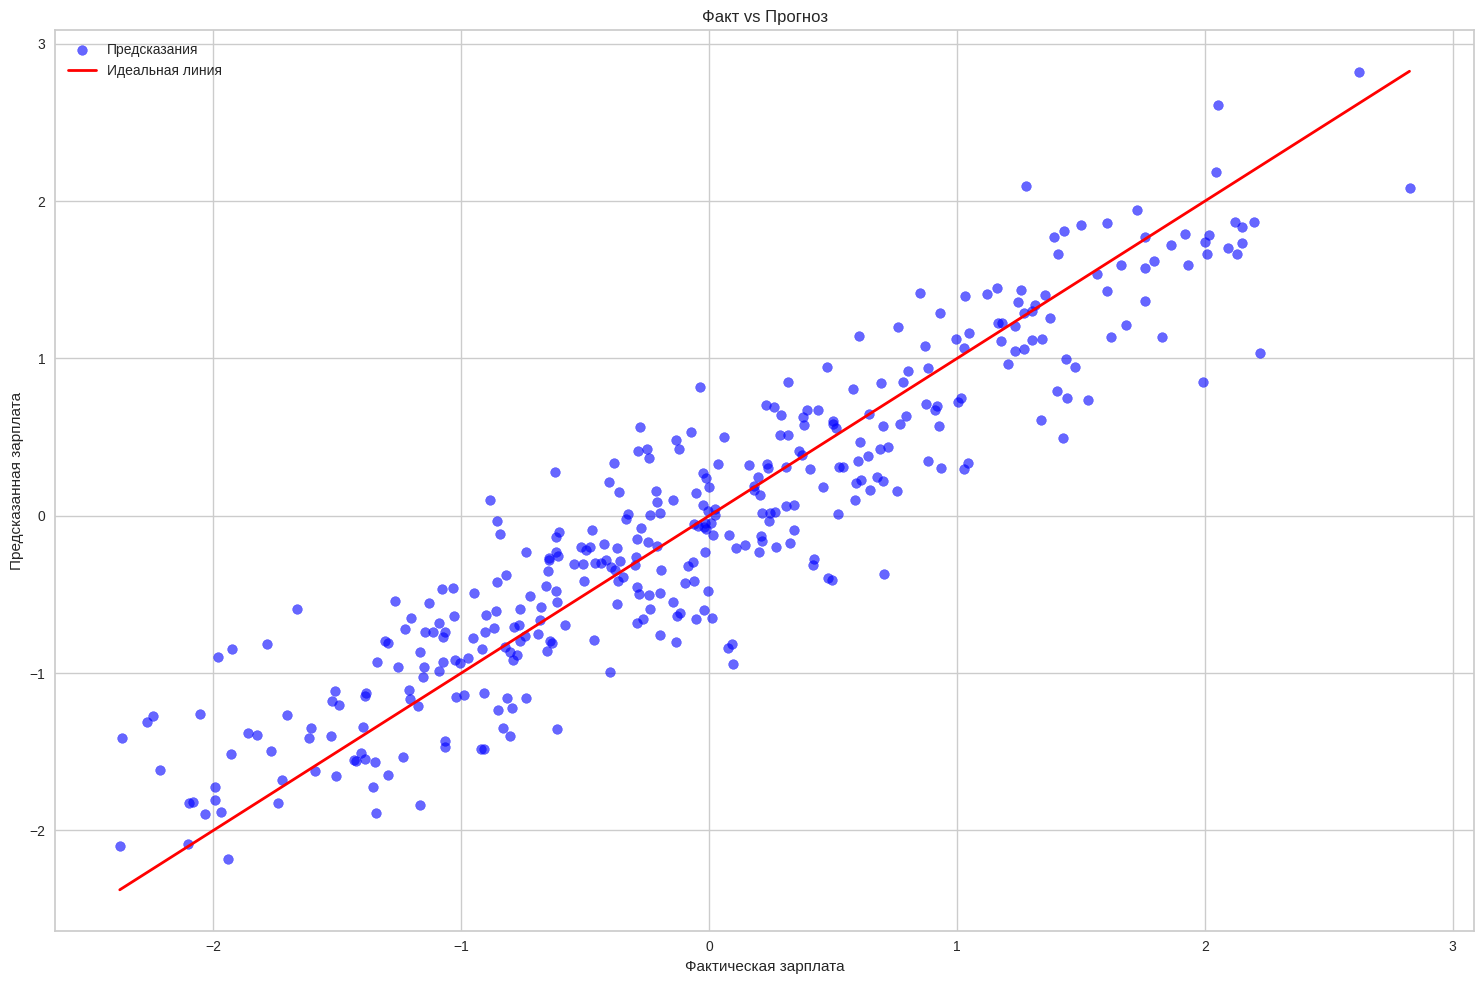

In [433]:
y_pred = model_lr.predict(X_test)

y_test_np = y_test.values
y_pred_np = y_pred

sorted_idx = np.argsort(y_test_np)
y_test_sorted = y_test_np[sorted_idx]
y_pred_sorted = y_pred_np[sorted_idx]

plt.figure(figsize=(15, 10))
plt.scatter(y_test_sorted, y_pred_sorted,
            alpha=0.6, color='blue', label='Предсказания')
plt.plot([y_test_sorted.min(), y_test_sorted.max()],
         [y_test_sorted.min(), y_test_sorted.max()],
         color='red', linewidth=2, label='Идеальная линия')

plt.xlabel('Фактическая зарплата')
plt.ylabel('Предсказанная зарплата')
plt.title('Факт vs Прогноз')
plt.legend()
plt.tight_layout()
plt.show()

График показывает, что линейная модель точно и устойчиво предсказывает зарплату. Точки плотно лежат вдоль идеальной линии y = x. Модель не имеет систематических ошибок, разброс минимален — это отличный результат, пригодный для реального использования.

### Регрессия с методом k-ближайших соседей (KNN)

In [437]:

model_knn = KNeighborsRegressor(n_neighbors=5)

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN регрессия:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_knn}")
print(f"R-squared (R²): {r2_knn}")


KNN регрессия:
Mean Squared Error (MSE): 0.23776561016684788
Mean Absolute Error (MAE): 0.38715977287716213
Mean Absolute Percentage Error (MAPE): 2.7848775547132063
R-squared (R²): 0.7945224122250008


- **MSE (Mean Squared Error):** 0.2378. Хорошее качество модели — ошибка в квадрате стандартизированных значений умеренная.  
- **MAE (Mean Absolute Error):** 0.3872. Точность на хорошем уровне — в среднем предсказания отклоняются на 0.39 σ от реальности.  
- **MAPE (Mean Absolute Percentage Error):** 2.78%. Очень низкая процентная ошибка — модель ошибается менее чем на 3% от фактической зарплаты.  
- **R² (коэффициент детерминации):** 0.795. Модель объясняет почти 80% вариации зарплаты в тестовых данных — сильный результат для KNN-регрессии.

**Вывод:** KNN-регрессор показывает стабильную и точную работу с минимальной процентной ошибкой (2.78%) и высоким R² (0.795).

### Регрессия с деревом решений (Decision Tree)

In [438]:
model_dt = DecisionTreeRegressor(random_state=42)

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree регрессия:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_dt}")
print(f"R-squared (R²): {r2_dt}")


Decision Tree регрессия:
Mean Squared Error (MSE): 0.4638748922970963
Mean Absolute Error (MAE): 0.5404030322743478
Mean Absolute Percentage Error (MAPE): 3.239573658626262
R-squared (R²): 0.5991182499785874


- **MSE (Mean Squared Error):** 0.4639. Качество модели среднее — ошибка в квадрате заметно выше, чем у линейной регрессии и KNN.  
- **MAE (Mean Absolute Error):** 0.5404. Средняя абсолютная ошибка выше 0.5 σ — предсказания отклоняются ощутимо.  
- **MAPE (Mean Absolute Percentage Error):** 3.24%. Процентная ошибка приемлемая, но хуже, чем у KNN и линейной модели (около 3.2% от зарплаты).  
- **R² (коэффициент детерминации):** 0.599. Модель объясняет всего 60% вариации зарплаты — слабо по сравнению с другими.

**Вывод:** Decision Tree регрессия сильно уступает линейной регрессии (R² = 0.854) и KNN (R² = 0.795). Высокие MSE/MAE и низкий R² указывают на переобучение или недостаточную настройку (возможно, дерево слишком глубокое или не обрезано).

### Сравнение результатов всех методов

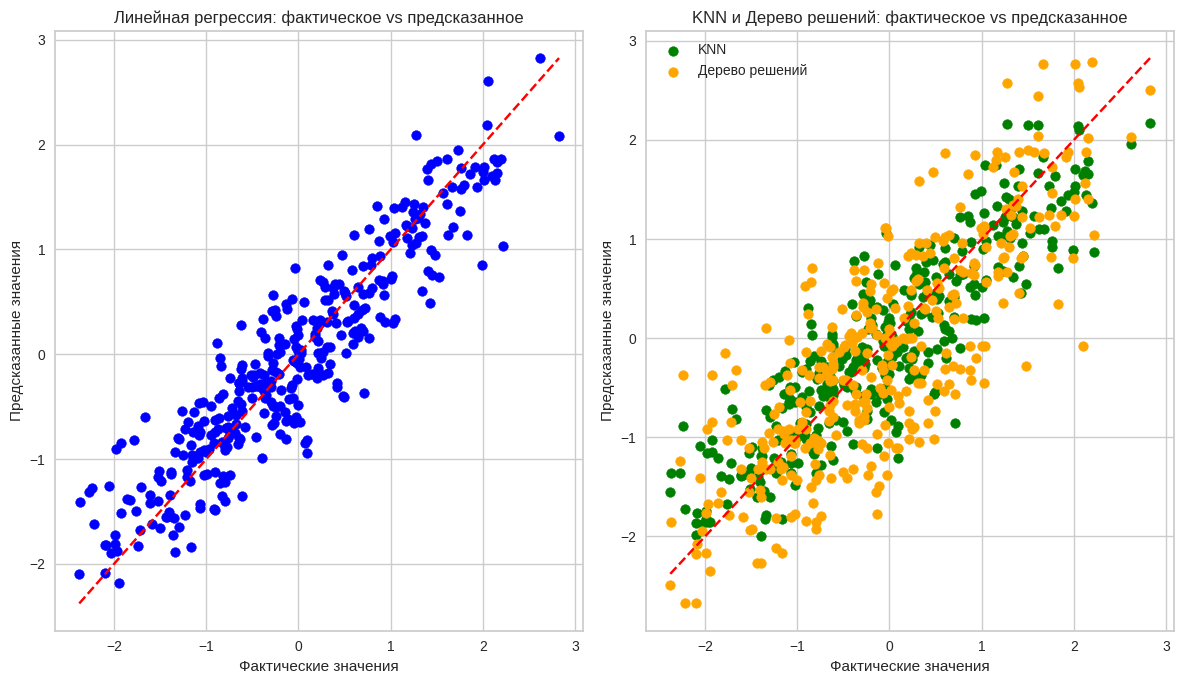

In [441]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', label='Линейная регрессия')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Линейная регрессия: фактическое vs предсказанное')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, color='green', label='KNN')
plt.scatter(y_test, y_pred_dt, color='orange', label='Дерево решений')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('KNN и Дерево решений: фактическое vs предсказанное')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()

plt.tight_layout()
plt.show()


**Вывод**: Дерево решений хуже справляется с генерализацией, чем KNN, а KNN хуже линейной регрессии.  
Лучшая модель по графику - линейная регрессия, так как минимальный разброс, высокая точность на всех уровнях.

#**Вывод**

В ходе лабораторной работы были исследованы методы регрессии для предсказания значений на основе различных данных. В первой части с использованием простого датасета regression_var_2.csv простая линейная регрессия показала умеренные результаты: для модели y ~ x1 R² составил 0.4283 с MAE 1.1489, а для y ~ x2 R² был ниже — 0.3696 с MAE 1.1004. Это указывает на наличие линейной связи, но с большим необъясненным разбросом, что подтверждается графиками и остатками. Во второй части полиномиальная регрессия на том же датасете улучшила метрики: степень 2 дала R² 0.4289 с MAE 1.1481 (слабое улучшение), а степень 5 — R² 0.4839 с MAE 1.0960, но визуализация выявила риск переобучения из-за чрезмерной извилистости кривой.

В третьей части на реальном датасете salary.csv после удаления выбросов (48 строк), кодирования категориальных признаков и отбора по корреляции (>0.1) линейная регрессия продемонстрировала отличные результаты: R² 0.854, MAE 0.326, MAPE 2.48%, с плотным прилеганием предсказаний к фактическим значениям на графике. KNN-регрессия дала хорошие, но чуть худшие метрики (R² 0.795, MAPE 2.78%), с заметным разбросом. Дерево решений оказалось наименее эффективным (R² 0.599, MAPE 3.24%), с сильным разбросом, указывающим на переобучение без настройки.

В итоге, для задач с линейными зависимостями, как в первой части, простая линейная регрессия достаточна, но при нелинейности, как во второй, полиномиальная (степень 2–5) улучшает точность, хотя требует баланса для избежания переобучения. Для реальных сложных данных, как в третьей части, наиболее целесообразно использовать линейную регрессию: она проста, интерпретируема, устойчива и дает наивысшую точность (R² 0.854). KNN подходит как альтернатива для нелинейных случаев, но уступает, а дерево решений требует тщательной настройки (например, обрезки) и в текущем виде не рекомендуется.